In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month

# Initialize Spark session
spark = SparkSession.builder.appName("FireIncidents").getOrCreate()

In [ ]:
# Load dataset
url = "https://data.sfgov.org/resource/wr8u-xric.csv"
df = pd.read_csv(url)
sdf = spark.createDataFrame(df)

In [ ]:
# Data Preprocessing
# Selecting relevant columns (correcting column names based on available ones in dataset)
sdf = sdf.select("incident_number", "alarm_dttm", "primary_situation", "station_area", "zipcode", "battalion")
sdf = sdf.withColumn("alarm_dttm", sdf["alarm_dttm"].cast("timestamp"))
sdf = sdf.withColumn("year", year("alarm_dttm"))
sdf = sdf.withColumn("month", month("alarm_dttm"))
df_pandas = sdf.toPandas().dropna()

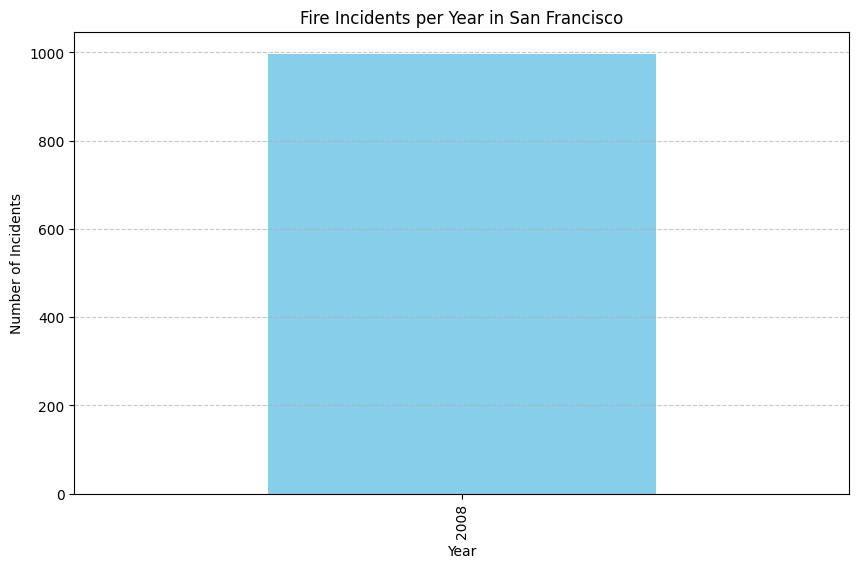

In [ ]:
# Matplotlib Visualization 1: Fire Incidents per Year
plt.figure(figsize=(10, 6))
df_pandas['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Fire Incidents per Year in San Francisco')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

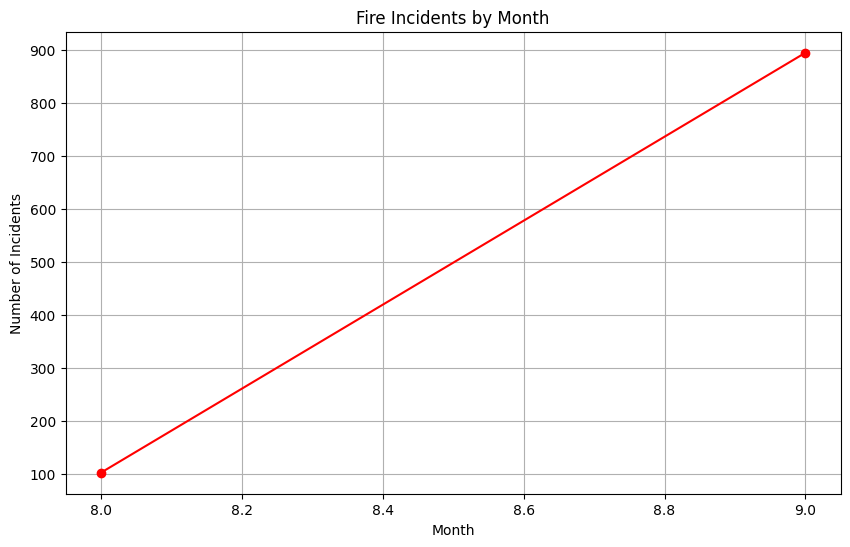

In [ ]:
# Matplotlib Visualization 2: Fire Incidents by Month
plt.figure(figsize=(10, 6))
df_pandas['month'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title('Fire Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

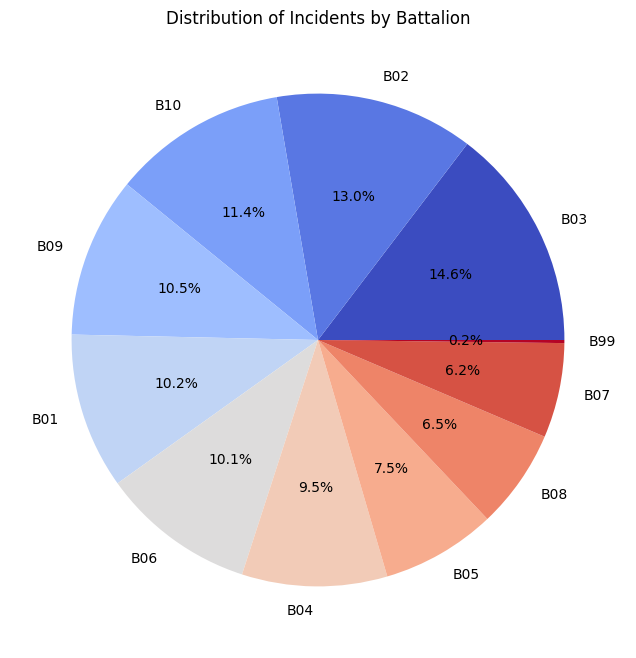

In [ ]:
# Matplotlib Visualization 3: Distribution of Incidents by Battalion
plt.figure(figsize=(8, 8))
df_pandas['battalion'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title('Distribution of Incidents by Battalion')
plt.ylabel('')
plt.show()

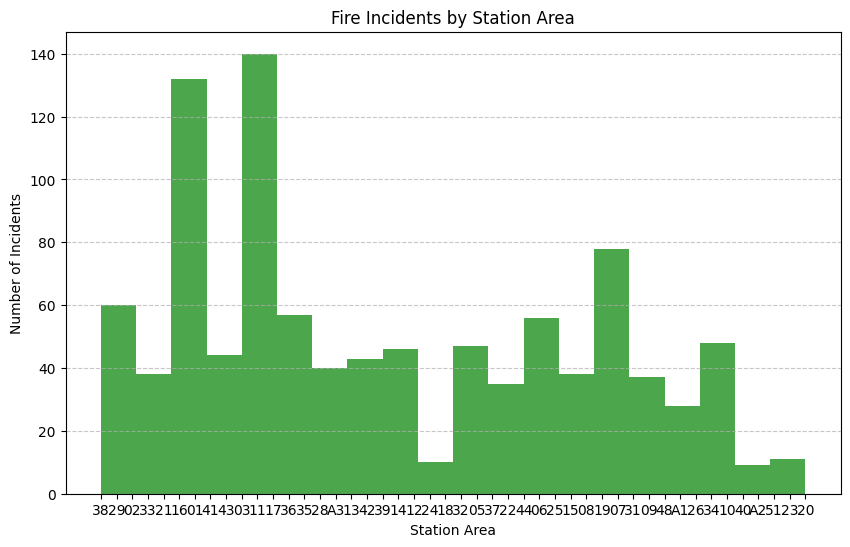

In [ ]:
# Matplotlib Visualization 4: Fire Incidents by Station Area
plt.figure(figsize=(10, 6))
plt.hist(df_pandas['station_area'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Fire Incidents by Station Area')
plt.xlabel('Station Area')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

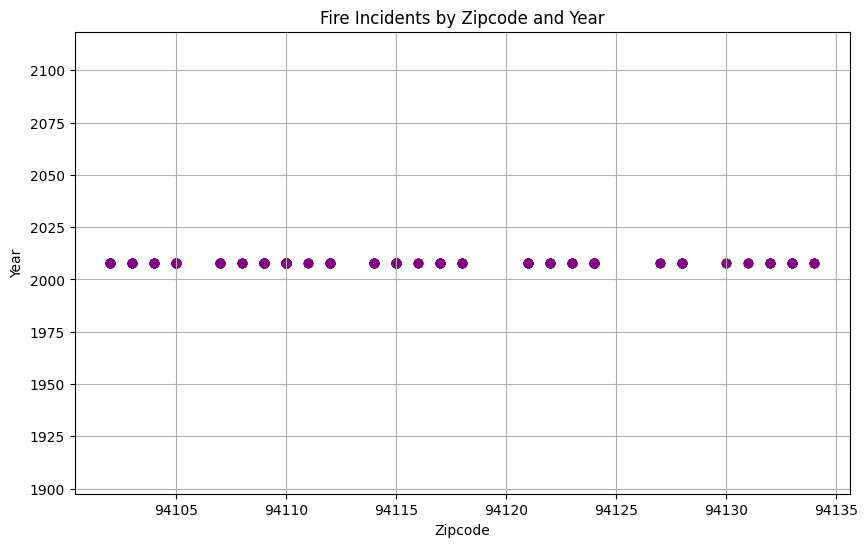

In [ ]:
# Matplotlib Visualization 5: Fire Incidents by Zipcode and Year
plt.figure(figsize=(10, 6))
plt.scatter(df_pandas['zipcode'], df_pandas['year'], alpha=0.5, color='purple')
plt.title('Fire Incidents by Zipcode and Year')
plt.xlabel('Zipcode')
plt.ylabel('Year')
plt.grid(True)
plt.show()

<ipython-input-12-4f1dc021647f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df_pandas, palette='viridis')


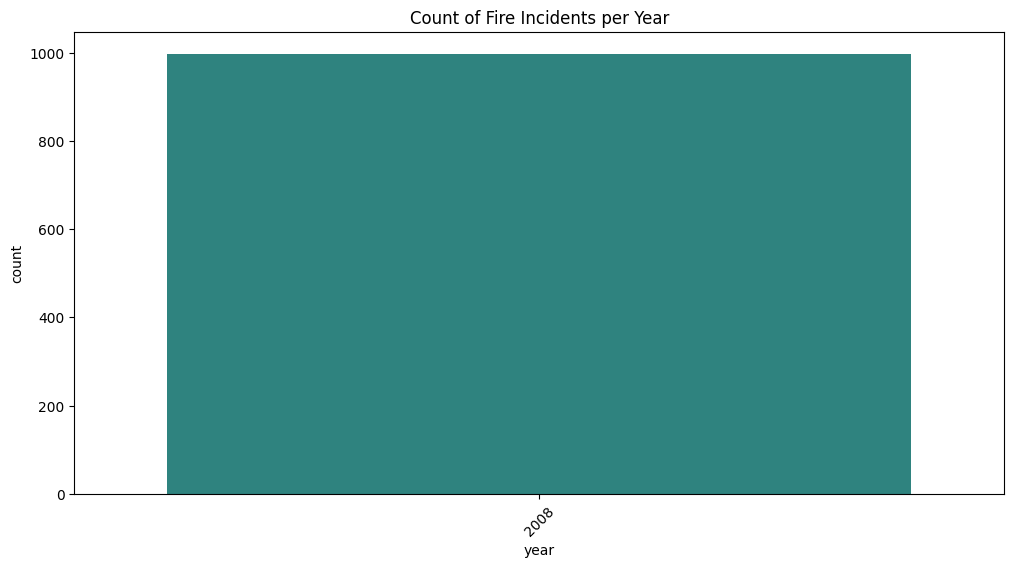

In [ ]:
# Seaborn Visualization 1: Count of Fire Incidents per Year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_pandas, palette='viridis')
plt.title('Count of Fire Incidents per Year')
plt.xticks(rotation=45)
plt.show()

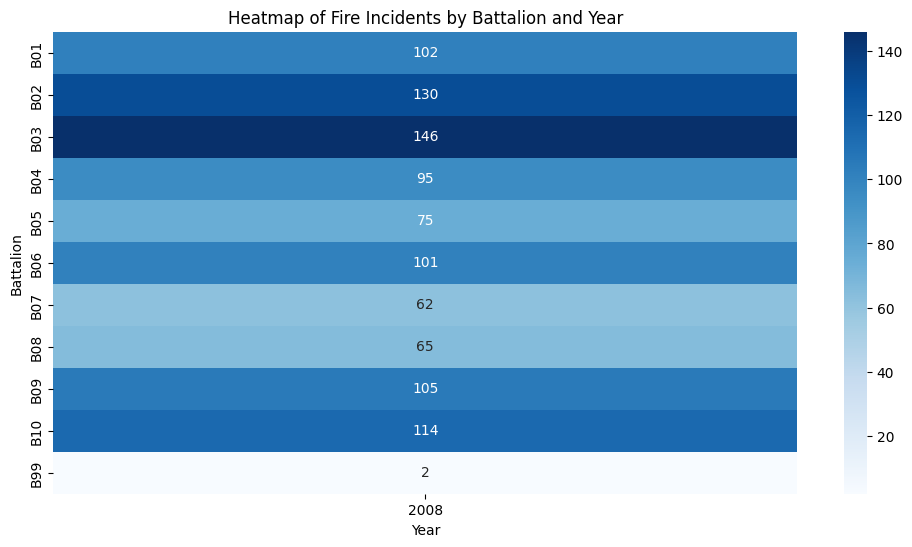

In [ ]:
# Seaborn Visualization 2: Heatmap of Fire Incidents by Battalion and Year
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df_pandas['battalion'], df_pandas['year']), cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Fire Incidents by Battalion and Year')
plt.xlabel('Year')
plt.ylabel('Battalion')
plt.show()

<ipython-input-14-909190130e70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='month', data=df_pandas, palette='Set2')


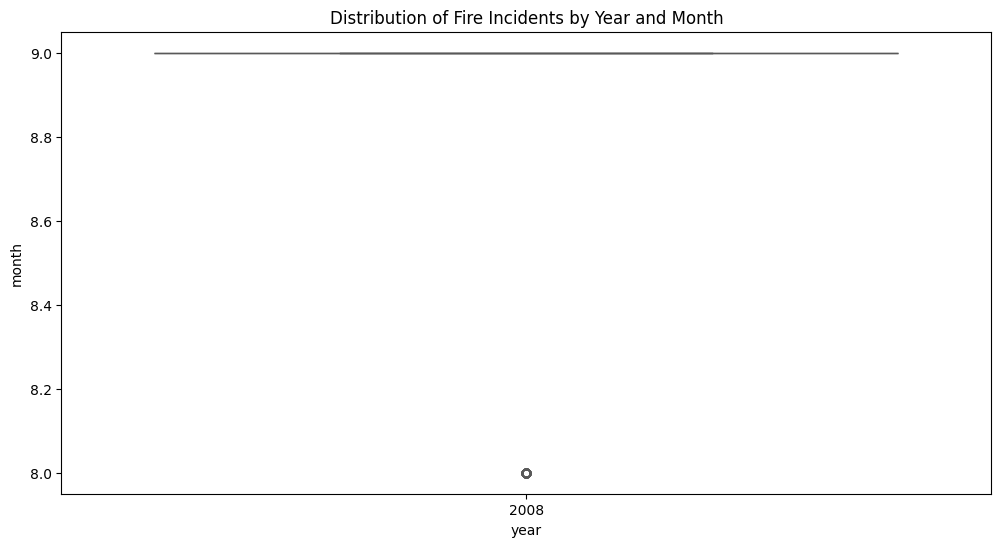

In [ ]:
# Seaborn Visualization 3: Boxplot of Fire Incidents by Year and Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='month', data=df_pandas, palette='Set2')
plt.title('Distribution of Fire Incidents by Year and Month')
plt.show()

<ipython-input-15-ac98495fabb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='month', data=df_pandas, palette='coolwarm')


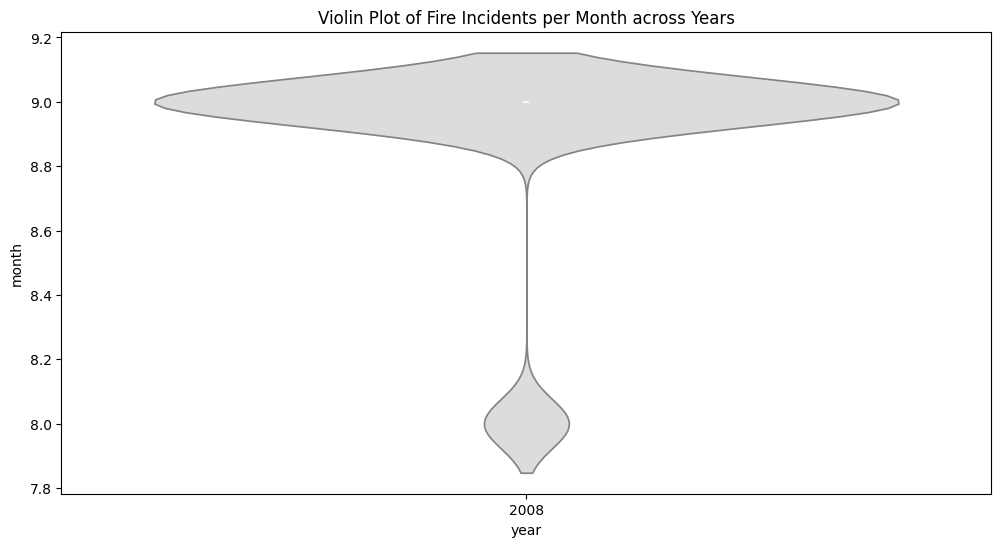

In [ ]:
# Seaborn Visualization 4: Violin Plot of Fire Incidents per Month across Years
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='month', data=df_pandas, palette='coolwarm')
plt.title('Violin Plot of Fire Incidents per Month across Years')
plt.show()

<ipython-input-16-c006dbbf80a5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_pandas['month'], shade=True, color='brown')


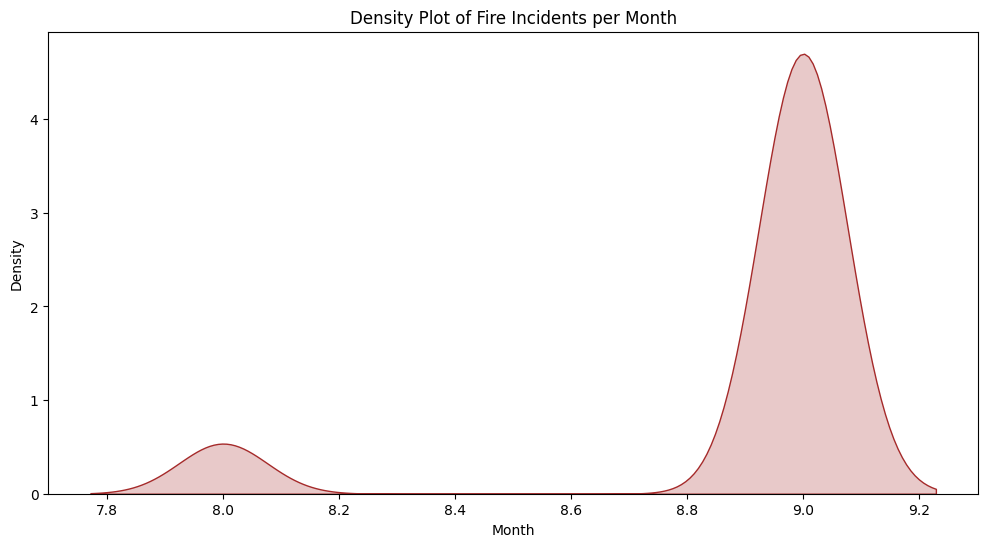

In [ ]:
# Seaborn Visualization 5: Density Plot of Fire Incidents per Month
plt.figure(figsize=(12, 6))
sns.kdeplot(df_pandas['month'], shade=True, color='brown')
plt.title('Density Plot of Fire Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Density')
plt.show()

In [ ]:
# Stop Spark session
spark.stop()